In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from pmdarima import auto_arima
from CommonFunctions import *
%matplotlib inline

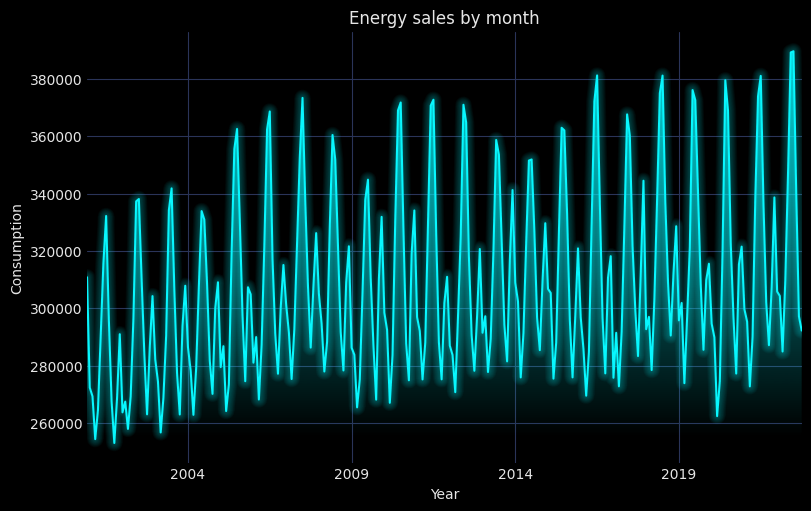

In [3]:
dataset = pd.read_csv('Retail_sales_of_electricity_United_States_monthly.csv', header=4)
dataset.drop_duplicates(subset='Month', inplace=True)
dataset.set_index('Month', inplace=True)
dataset.index = pd.to_datetime(dataset.index, format='%b %Y')
dataset.dropna(inplace=True)
dataset = dataset['all sectors million kilowatthours']
dataset = dataset.iloc[::-1]
dataset.rename('All sectors [MkWh]', inplace=True)
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
    dataset.plot(ax=axes)
    axes.set(xlabel='Year', ylabel='Consumption', title='Energy sales by month')
    enhance_plot(figure, axes, glow=True, alpha_gradient=0.8)

In [4]:
auto_arima(dataset, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=5376.355, Time=1.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5362.599, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5383.061, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5359.481, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5370.253, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=5357.818, Time=0.06 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=5359.499, Time=0.16 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=5361.212, Time=0.38 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=5380.057, Time=0.12 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=5364.315, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5381.269, Time=0.07 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=5374.202, Time=0.19 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=5362.040, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 2.989 seconds


ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [5]:
test_years = 2
train = dataset.iloc[:-12 * test_years]
test = dataset.iloc[-12 * test_years:]
len(test)

24

In [6]:
SARIMA_model = SARIMAX(train, order=(0, 0, 1), seasonal_order=(0, 1, 0, 12), freq='MS')
SARIMA_prediction = (SARIMA_model.fit()
                     .predict(start := len(train), start + len(test) - 1).rename('SARIMA'))
error = mean_absolute_percentage_error(test, SARIMA_prediction) * 100

C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


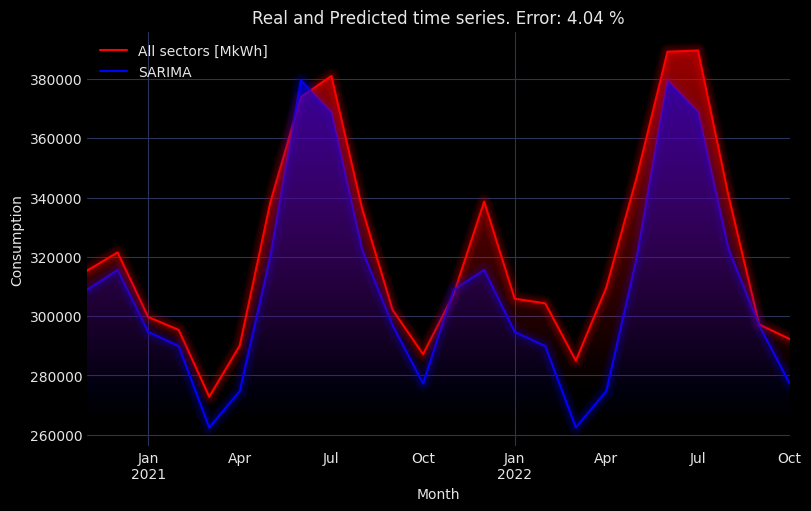

In [7]:
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
    test.plot(ax=axes, color='red')
    SARIMA_prediction.plot(ax=axes, color='blue')
    axes.set(xlabel='Month', ylabel='Consumption', 
             title=f'Real and Predicted time series. Error: {error:.2f} %')
    axes.legend()
    enhance_plot(figure, axes, glow=True, alpha_gradient=0.6)